In [1]:
%pylab inline
from base_func import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
complex_traj_files = ['data/complex100/ca{}.xtc'.format(i) for i in range(2,12) ]
liganded_traj_files = ['data/liganded/ca{}.xtc'.format(i) for i in range(1,11) ]
complex_pdb = 'data/complex_ca.pdb'
liganded_pdb = 'data/liganded_ca.pdb'

In [3]:
liganded_network = Network(liganded_traj_files,liganded_pdb,auto_build=False,traj_start=3000,traj_end=10000,stride = 1)
complex_network = Network(complex_traj_files,complex_pdb,auto_build=False,traj_start=3000,traj_end=10000,stride = 1)
# if auto_build=True, it will auto read trajs,calculate correlation,build graph and do community analysis; on the contrary, you need do those
# by yourself.

# or load network from stored file
# liganded_network = DataLoad('liganded_network.dat')
# complex_network = DataLoad('complex_network.dat')


In [6]:
# load trajs
liganded_network.load_traj()
complex_network.load_traj()

In [4]:
#load correlation from stored file
liganded_network.load_correlation('data/liganded_corr.dat')
complex_network.load_correlation('data/complex_corr.dat')

# or calculate correlation by buildin method
# liganded_network.correlation_analysis()
# complex_network.correlation_analysis()

# save correlation and no need repeat it next time
liganded_network.save_correlation()
complex_network.save_correlation()

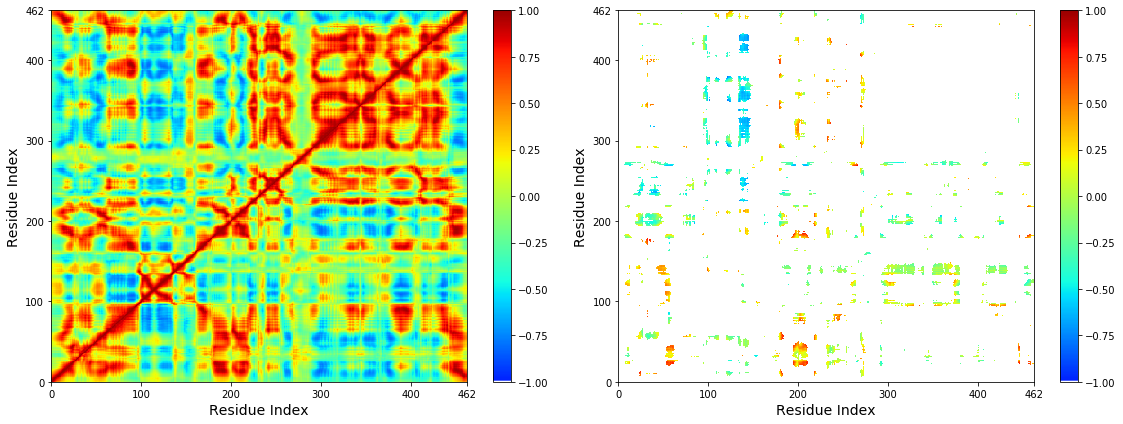

In [5]:
# plot correlation
liganded_correlation = liganded_network.correlation
complex_correlation = complex_network.correlation
correlation = np.zeros(liganded_correlation.shape)
difference = -np.ones(liganded_correlation.shape)
for i in range(correlation.shape[0]):
    for j in range(correlation.shape[0]):
        correlation[i][j] = liganded_correlation[i][j]
        correlation[j][i] = complex_correlation[i][j]
        diff = liganded_correlation[i][j] - complex_correlation[i][j]
        #print diff,
        if abs(diff) >= 0.4:
            difference[i][j] = liganded_correlation[i][j]
            difference[j][i] = complex_correlation[i][j]
figure(figsize = (16,6))
subplot(121)
ax = gca()
plot_correlation(correlation,ax=ax)
subplot(122)
ax = gca()
plot_correlation(difference,ax=ax)
tight_layout()

In [5]:
# load graph from a stored graph file
liganded_network.load_graph('data/liganded_graph.dat')
complex_network.load_graph('data/complex_graph.dat')
# or construct graph
# liganded_network.construct_graph()
# complex_network.construct_graph()

# save graph
liganded_network.save_graph()
complex_network.save_graph()

In [6]:
# node centralities that assess the density of connections per node
liganded_network.calc_centrality()
complex_network.calc_centrality()

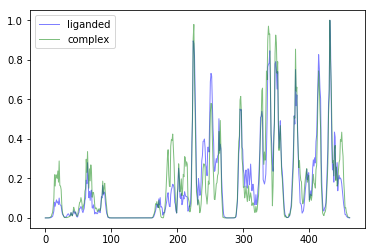

In [7]:
plot(liganded_network.centrality,color='b',lw=1,label='liganded',alpha=0.5)
plot(complex_network.centrality,color='g',lw=1,label='complex',alpha=0.5)
legend()

In [8]:
# analysis community by Girvan–Newman algorithm
liganded_network.community_analysis()
complex_network.community_analysis()

(0, 1)

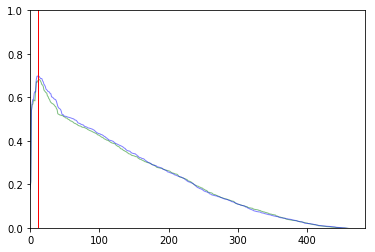

In [9]:
# plot modularity value, the maximum modularity value general mean that the community partition is the best.
plot(liganded_network.modularity_q,color='g',lw=1,label='liganded',alpha=0.5)
plot(complex_network.modularity_q,color='b',lw=1,label='complex',alpha=0.5)
plot([11,11],[0,1],color='r',lw=1)
xlim(0,max(liganded_network.residue_num,complex_network.residue_num))
ylim(0,1)

In [10]:
# find paths
liganded_network.suboptmal_paths(335,266,500)
liganded_network.suboptmal_paths(335,278,500)
complex_network.suboptmal_paths(335,266,500)
complex_network.suboptmal_paths(335,278,500)
liganded_paths_1 = liganded_network.paths[(335,266)]
liganded_paths_2 = liganded_network.paths[(335,278)]
complex_paths_1 = complex_network.paths[(335,266)]#近端
complex_paths_2 = complex_network.paths[(335,278)]#远端


/home/denglei/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


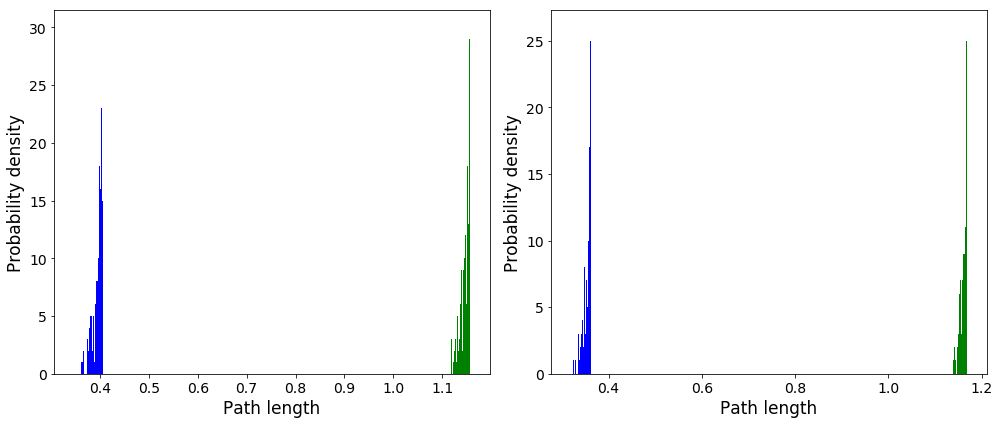

In [11]:
# statistical paths distribution 
figure(figsize=(14,6))
paths = [liganded_paths_1,complex_paths_1,liganded_paths_2,complex_paths_2]

subplot(121)
data = [p[0] for p in liganded_paths_1]
hist(data,bins=100,normed=False,cumulative=False,histtype='barstacked',color='b')
data = [p[0] for p in liganded_paths_2]
hist(data,bins=100,normed=False,cumulative=False,histtype='barstacked',color='g')
ylabel('Probability density',fontsize=17)
xlabel('Path length',fontsize=17)
yticks(fontsize=14)
xticks(fontsize=14)
subplot(122)
data = [p[0] for p in complex_paths_1]
hist(data,bins=100,normed=False,cumulative=False,histtype='barstacked',color='b')
data = [p[0] for p in complex_paths_2]
hist(data,bins=100,normed=False,cumulative=False,histtype='barstacked',color='g')
ylabel('Probability density',fontsize=17)
yticks(fontsize=14)
xticks(fontsize=14)
xlabel('Path length',fontsize=17)
tight_layout()
#savefig('suboptimal.png', format='png',dpi=720,bbox_inches="tight")

In [16]:
# save network and next time could direct reload it 
DataSave('liganded_network.dat',liganded_network)
DataSave('complex_network.dat',complex_network)

In [24]:
def find_same_color(community_1,community_2,colors):
    '''
    Make the corresponding community have the same color in two community system
    '''
    color_1 = [None for i in range(len(community_1))]
    color_2 = [None for i in range(len(community_2))]
    color = iter(colors)
    m = 0
    for i,c_1 in enumerate(community_1):
        for j,c_2 in enumerate(community_2):
            num_1 = len(c_1)
            num_2 = len(c_2)
            diff = c_1.intersection(c_2)
            if len(diff) >= mean([num_1,num_2])/2.0:
                c = color.next()
                color_1[i] = c
                color_2[j] = c
                break
    for i in range(len(color_1)):
        if color_1[i] == None:
            color_1[i] = color.next()
    for i in range(len(color_2)):
        if color_2[i] == None:
            color_2[i] = color.next()
    return color_1,color_2

In [25]:
colors = get_cmap('viridis').colors+get_cmap('inferno').colors+get_cmap('plasma').colors+get_cmap('magma').colors
colors = [colors[i*(len(colors)/30)] for i in range(30)]
li_colors,com_colors = find_same_color(liganded_network.communities[11],complex_network.communities[11],colors)

In [26]:
liganded_v = Visualization(liganded_network,liganded_pdb,colors=li_colors)
complex_v = Visualization(complex_network,complex_pdb,colors=com_colors)

In [27]:
liganded_v.paths()
complex_v.paths()

generated data/liganded_ca.pdb_paths.pml script and you can open it with pymol to show
generated data/complex_ca.pdb_paths.pml script and you can open it with pymol to show


In [28]:
liganded_v.community(11)
complex_v.community(11)

generated data/liganded_ca.pdb_community.pml script and you can open it with pymol to show
generated data/complex_ca.pdb_community.pml script and you can open it with pymol to show


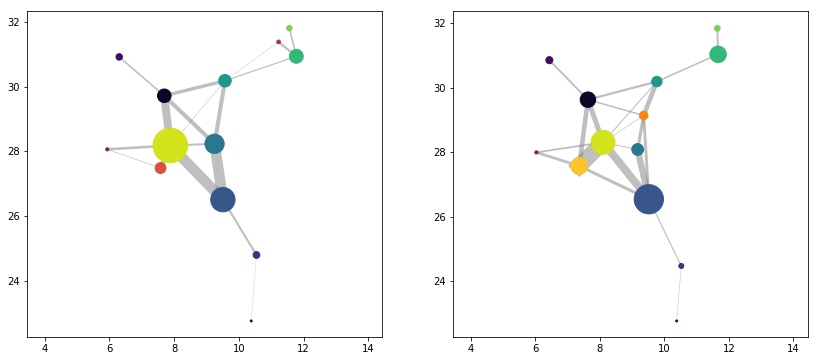

In [32]:
figure(figsize=(14,6))
subplot(121)
ax = gca()
liganded_v.plot_depiction_communities(11,ax=ax,radius=2.5, xr=radians(45), yr=radians(-110), zr=radians(-95), R=10.0)
subplot(122)
ax = gca()
complex_v.plot_depiction_communities(11,ax=ax,radius=2.5, xr=radians(45), yr=radians(-110), zr=radians(-95), R=10.0)